In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Kshitiz Bhargava 21BCE2067

In [2]:
# Define the path to your dataset
train_dir = '/Datasets/Dogs/images/Images'  # Replace with your actual path

# Image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Kshitiz Bhargava 21BCE2067

In [3]:
# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Kshitiz Bhargava 21BCE2067

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


In [4]:
# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.summary()

# Kshitiz Bhargava 21BCE2067

/Users/manvendrasingh/Library/CloudStorage/OneDrive-vit.ac.in/7th Sem/Deep Learning/Lab/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        61,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,457,656 (169.59 MB)

 Trainable params: 44,457,656 (169.59 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Kshitiz Bhargava 21BCE2067

In [6]:
# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

# Kshitiz Bhargava 21BCE2067

Epoch 1/10


/Users/manvendrasingh/Library/CloudStorage/OneDrive-vit.ac.in/7th Sem/Deep Learning/Lab/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


515/515 ━━━━━━━━━━━━━━━━━━━━ 373s 721ms/step - accuracy: 0.0121 - loss: 4.8656 - val_accuracy: 0.0253 - val_loss: 4.6056
Epoch 2/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 134us/step - accuracy: 0.0000e+00 - loss: 4.6968 - val_accuracy: 0.0000e+00 - val_loss: 4.7287
Epoch 3/10


2024-09-03 12:31:06.249699: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-09-03 12:31:06.305816: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


515/515 ━━━━━━━━━━━━━━━━━━━━ 392s 759ms/step - accuracy: 0.0267 - loss: 4.5671 - val_accuracy: 0.0396 - val_loss: 4.4607
Epoch 4/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 121us/step - accuracy: 0.0312 - loss: 4.3562 - val_accuracy: 0.0000e+00 - val_loss: 4.5147
Epoch 5/10


2024-09-03 12:37:38.988527: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


515/515 ━━━━━━━━━━━━━━━━━━━━ 417s 807ms/step - accuracy: 0.0451 - loss: 4.3916 - val_accuracy: 0.0529 - val_loss: 4.3190
Epoch 6/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 108us/step - accuracy: 0.0625 - loss: 4.0620 - val_accuracy: 0.0000e+00 - val_loss: 4.2804
Epoch 7/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 417s 808ms/step - accuracy: 0.0677 - loss: 4.2188 - val_accuracy: 0.0615 - val_loss: 4.2261
Epoch 8/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 115us/step - accuracy: 0.0938 - loss: 4.2666 - val_accuracy: 0.1250 - val_loss: 4.1342
Epoch 9/10


2024-09-03 12:51:34.733053: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


515/515 ━━━━━━━━━━━━━━━━━━━━ 418s 809ms/step - accuracy: 0.1028 - loss: 4.0351 - val_accuracy: 0.0758 - val_loss: 4.1484
Epoch 10/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 112us/step - accuracy: 0.0000e+00 - loss: 4.0593 - val_accuracy: 0.1250 - val_loss: 3.8467


In [7]:
val_loss, val_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print('Validation accuracy:', val_acc)
print('Validation loss:', val_loss)

# Kshitiz Bhargava 21BCE2067

127/127 ━━━━━━━━━━━━━━━━━━━━ 25s 195ms/step - accuracy: 0.0733 - loss: 4.1561
Validation accuracy: 0.07775590568780899
Validation loss: 4.156391620635986


In [8]:
plt.figure(figsize=(12, 4))

# Kshitiz Bhargava 21BCE2067

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

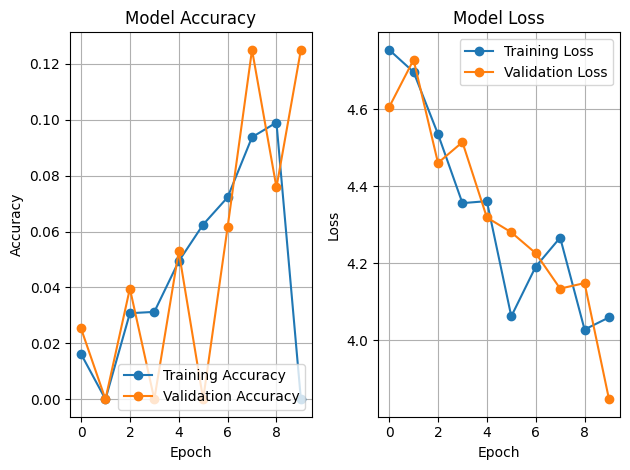

In [9]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Kshitiz Bhargava 21BCE2067